# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [61]:
 # Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print (query_url)


http://api.openweathermap.org/data/2.5/weather?appid=cafaaaddc68611925d833ca46d3cc1bf&units=imperial&q=


In [62]:
# set up lists to hold reponse info
lat = []
long = []
max_temp = []
city_names = []
cloudiness = []
country = []
date = []
humidity = []
wind_speed = []

counter = 0
response_list = []

print("STARTING THE REQUEST LOOP")
# Loop through the list of cities and perform a request for data on each
for city in cities[:500]:
    
    try: 
#         print("requesting "+ city)
        response = requests.get(query_url + city).json()
        response_list.append(response)

#         print(f"response={response}")
        
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        city_names.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
#         counter = counter +1
#         #group = 0
        
#         print ("PROCESSING RECORD" + str(counter))

        
    except Exception as e: 
#         print(f"city={city}")
        print(f'Skip Invalid Data {e}')
#         print(f"response={response}")
        continue 
        
# print(f"The latitude information received is: {lat}")
# print(f"The max temperature information received is: {max_temp}")


STARTING THE REQUEST LOOP
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid Data 'coord'
Skip Invalid

In [63]:
max_temp

[89.6,
 56.24,
 44.6,
 59.84,
 66.2,
 72.08,
 81.26,
 68.48,
 55,
 77,
 60.2,
 70.46,
 62,
 72.08,
 77.12,
 70.1,
 82.99,
 95.84,
 62.6,
 80.72,
 84.2,
 78.8,
 66.2,
 65.24,
 71.6,
 82.4,
 69.2,
 69.56,
 76.22,
 54.44,
 51.8,
 81,
 74.42,
 80.6,
 66.14,
 57.2,
 47.24,
 50,
 75.86,
 72.8,
 54.26,
 59,
 82.16,
 76.4,
 57.99,
 59,
 77,
 60.2,
 86,
 83.42,
 69.01,
 49.58,
 57.14,
 57.5,
 24.8,
 72.98,
 86,
 50,
 79.28,
 53.6,
 46,
 57.5,
 46,
 60.2,
 55,
 75.2,
 82.16,
 64,
 41,
 36.62,
 74.06,
 46.4,
 64.34,
 69.8,
 73.4,
 77,
 84.2,
 55.99,
 57,
 40.94,
 64.4,
 40.76,
 64,
 84.2,
 45,
 50.66,
 49.94,
 39.32,
 87.8,
 57,
 80.6,
 41.3,
 43.82,
 69.2,
 83.96,
 30.2,
 29.6,
 66.2,
 79.82,
 84.2,
 86,
 82.7,
 57.2,
 57.2,
 49.94,
 43.82,
 68,
 63.98,
 68,
 76.4,
 46,
 63.98,
 48.2,
 57.2,
 76.22,
 96.01,
 54.44,
 80.01,
 71.6,
 64.99,
 69.8,
 55.99,
 46.99,
 68,
 71.54,
 53.6,
 51.92,
 73.4,
 73.4,
 59.66,
 50.84,
 77,
 69.92,
 50.3,
 51.8,
 77.12,
 44.6,
 87.2,
 69.8,
 82.7,
 77,
 56.24,
 72

In [64]:
response 

{'coord': {'lon': -16.54, 'lat': 14.69},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 77,
  'pressure': 1012,
  'humidity': 88,
  'temp_min': 77,
  'temp_max': 77},
 'visibility': 8000,
 'wind': {'speed': 6.93, 'deg': 310},
 'clouds': {'all': 37},
 'dt': 1562203166,
 'sys': {'type': 1,
  'id': 2410,
  'message': 0.0074,
  'country': 'SN',
  'sunrise': 1562222469,
  'sunset': 1562269171},
 'timezone': 0,
 'id': 2249901,
 'name': 'Gat',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [65]:
df= pd.DataFrame({'lat': lat, 'long': long, 'max_temp' : max_temp, 'city_names' : city_names, 
                 'cloudiness': cloudiness, "country" : country, 'date': date, 'humidity': humidity, 
                 'wind_speed' : wind_speed })

df.head()

,lat,long,max_temp,city_names,cloudiness,country,date,humidity,wind_speed
0,20.89,-156.47,89.60,Kahului,40,US,1562203054,52,20.80
1,71.98,102.47,56.24,Khatanga,92,RU,1562202831,85,8.55
2,65.61,-37.64,44.60,Tasiilaq,100,GL,1562203134,75,8.05
3,38.36,31.42,59.84,Aksehir,0,TR,1562203134,54,4.05
4,-22.97,-42.02,66.20,Arraial do Cabo,0,BR,1562202845,88,2.24


In [66]:
df.to_csv('homework_python_api', index=False)


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

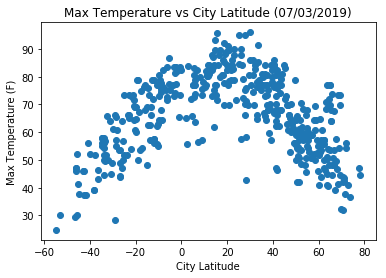

In [67]:
x = df['lat']
y = df['max_temp']

plt.xlabel("City Latitude")
plt.ylabel( "Max Temperature (F)")
plt.title("Max Temperature vs City Latitude (07/03/2019)")
plt.scatter(x,y)

In [ ]:
#We can see that the weather is the highest at lat 20-40, which seems accurate looking at the map (beijing and mexico are on this axes)

#### Latitude vs. Humidity Plot

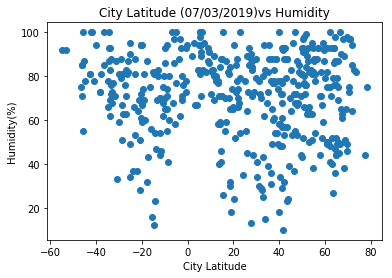

In [68]:
x = df['lat']
y = df['humidity']

plt.xlabel("City Latitude")
plt.ylabel( "Humidity(%)")
plt.title("City Latitude (07/03/2019)vs Humidity")
plt.scatter(x,y)

In [ ]:
#the humidity is spreaded, but for lattitude -20 (rio de janeiro) and +40 (Denver, NYC), the humidity is the lowest

#### Latitude vs. Cloudiness Plot

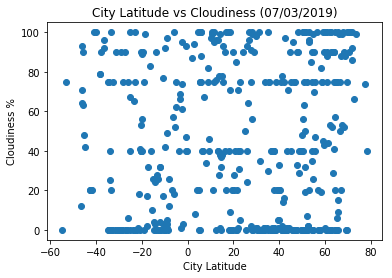

In [69]:
x = df['lat']
y = df['cloudiness']

plt.xlabel("City Latitude")
plt.ylabel( "Cloudiness %")
plt.title("City Latitude vs Cloudiness (07/03/2019)")
plt.scatter(x,y)

#### Latitude vs. Wind Speed Plot

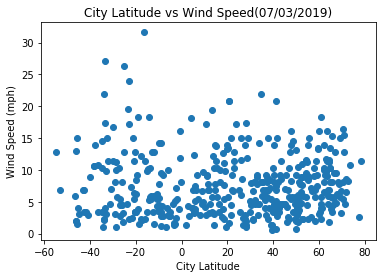

In [70]:
x = df['lat']
y = df['wind_speed']

plt.xlabel("City Latitude")
plt.ylabel( "Wind Speed (mph)")
plt.title("City Latitude vs Wind Speed(07/03/2019)")
plt.scatter(x,y)

In [ ]:
#there is almost not wind above lattitude 20 ( which would mean that the US and Russia barely have wind)